In [ ]:
pip install tensorflow numpy matplotlib


In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print shapes of the dataset
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
# Normalize the images to [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Expand the dimensions to [num_samples, height, width, channels]
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot vectors
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
# Train the CNN on the training data
history = model.fit(train_images, train_labels, epochs=50, batch_size=64,
                    validation_split=0.1)  # Using 10% of the data for validation


Epoch 1/50
844/844 [==============================] - 47s 55ms/step - loss: 0.1267 - accuracy: 0.9609 - val_loss: 0.0553 - val_accuracy: 0.9825
Epoch 2/50
844/844 [==============================] - 44s 52ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0389 - val_accuracy: 0.9902
Epoch 3/50
844/844 [==============================] - 45s 54ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0375 - val_accuracy: 0.9895
Epoch 4/50
844/844 [==============================] - 44s 52ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0312 - val_accuracy: 0.9905
Epoch 5/50
844/844 [==============================] - 43s 51ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0295 - val_accuracy: 0.9925
Epoch 6/50
844/844 [==============================] - 45s 54ms/step - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.0306 - val_accuracy: 0.9917
Epoch 7/50
844/844 [==============================] - 44s 52ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0351 - val_accuracy:

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)


313/313 [==============================] - 3s 8ms/step - loss: 0.0566 - accuracy: 0.9920
Test accuracy: 0.9919999837875366
Test loss: 0.056582603603601456


In [ ]:
import matplotlib.pyplot as plt

def plot_test_metrics(test_accuracy, test_loss):
    metrics = {'Test Accuracy': test_accuracy, 'Test Loss': test_loss}

    plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange'])
    plt.title('Test Metrics')
    plt.ylabel('Value')
    for i, value in enumerate(metrics.values()):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
    plt.ylim(0, max(test_accuracy, test_loss) + 0.1)  # Adjust ylim if necessary
    plt.show()


313/313 - 2s - loss: 0.0566 - accuracy: 0.9920 - 2s/epoch - 7ms/step


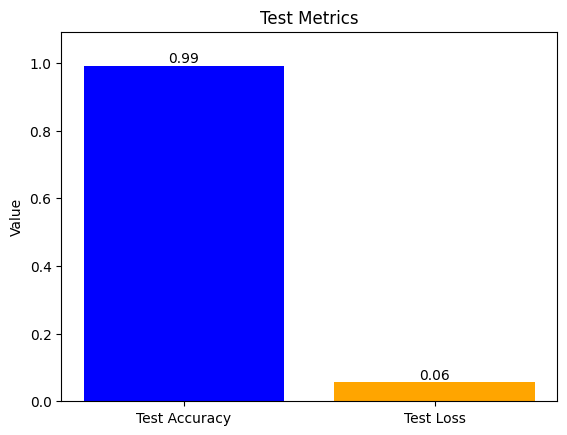

In [ ]:
# Assuming you have a trained model and test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Now plot the test accuracy and loss
plot_test_metrics(test_accuracy, test_loss)


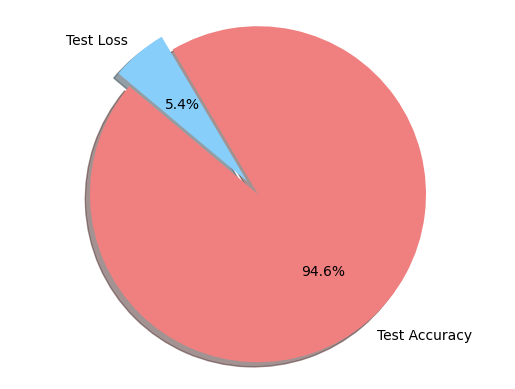

In [ ]:
def plot_test_metrics_pie(test_accuracy, test_loss):
    labels = 'Test Accuracy', 'Test Loss'
    sizes = [test_accuracy, test_loss]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # only "explode" the 1st slice

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

plot_test_metrics_pie(test_accuracy, test_loss)


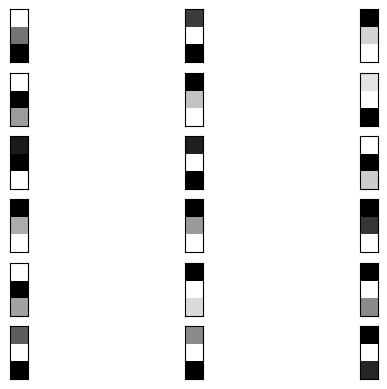

In [ ]:
# Get the weights of the first conv layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

import matplotlib.pyplot as plt

# Plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, j], cmap='gray')
        ix += 1
plt.show()


1/1 [==============================] - 0s 72ms/step


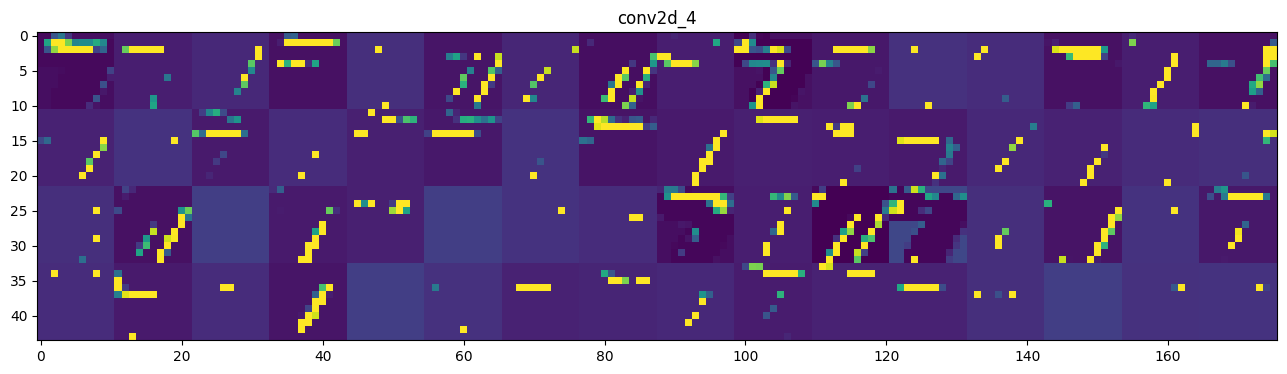

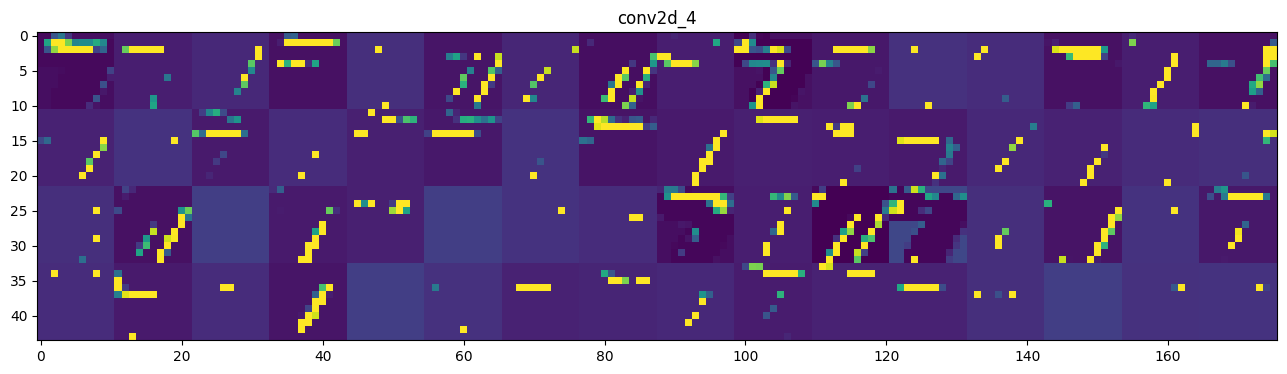

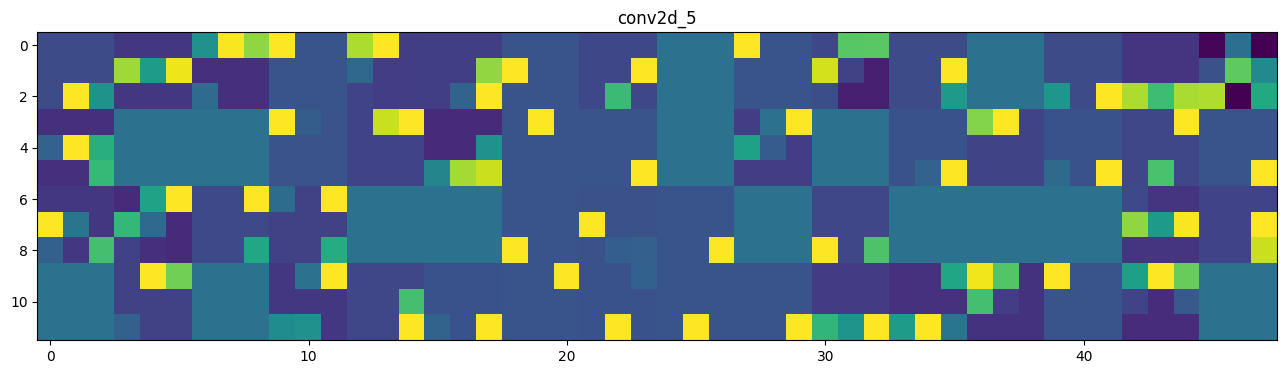

1/1 [==============================] - 0s 53ms/step


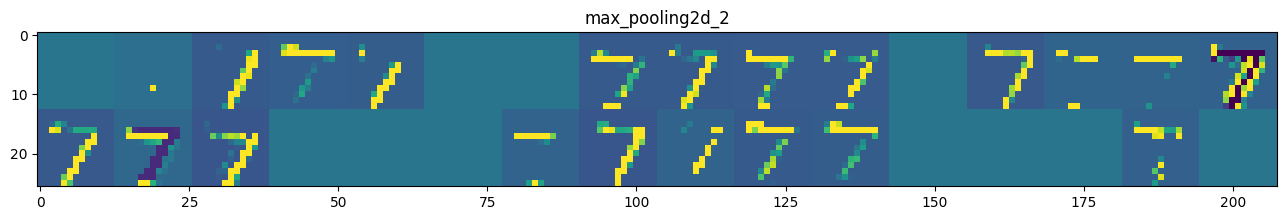

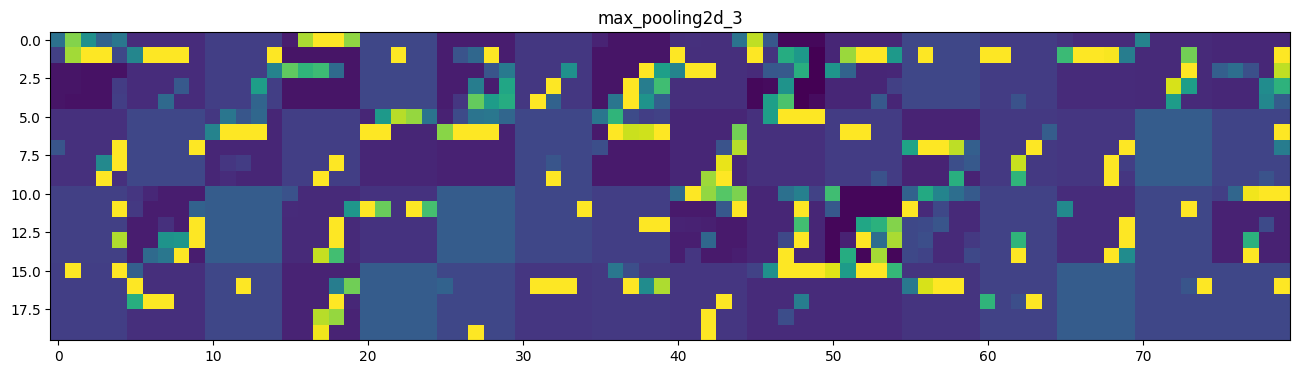

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_maps(model, test_images, layer_names):
    outputs = [model.get_layer(name).output for name in layer_names]
    activation_model = Model(inputs=model.input, outputs=outputs)
    activations = activation_model.predict(test_images)

    for layer_name, layer_activation in zip(layer_names, activations):
        # Check if the activation layer is not empty
        if len(layer_activation.shape) != 4:
            print(f"Layer {layer_name} output is not a 4D tensor, skipping visualization.")
            continue

        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        n_cols = n_features // 16
        display_grid = np.zeros((size * n_cols, size * 16))

        for col in range(n_cols):
            for row in range(16):
                if col * 16 + row >= n_features:  # Check for feature map count
                    break
                feature_map = layer_activation[0, :, :, col * 16 + row]
                feature_map -= feature_map.mean()
                feature_map /= feature_map.std() + 1e-5  # Prevent division by zero
                feature_map *= 64
                feature_map += 128
                feature_map = np.clip(feature_map, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = feature_map

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()
# plot_feature_maps(model, test_images[:1], ['conv2d_3', 'conv2d_4', 'conv2d_5'])
# Example model layer names - replace with your actual layer names
convolutional_layers = ['conv2d_4', 'conv2d_4', 'conv2d_5']
pooling_layers = ['max_pooling2d_2', 'max_pooling2d_3']

# Visualize feature maps for convolutional layers
plot_feature_maps(model, test_images[:1], convolutional_layers)

# Visualize feature maps for pooling layers
plot_feature_maps(model, test_images[:1], pooling_layers)





In [ ]:
import tensorflow as tf

def deep_dream(model, img, iterations=50, learning_rate=0.01):
    # Convert the image into a batch of one image
    img = tf.expand_dims(img, axis=0)

    for iteration in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(img)
            # Forward pass
            preds = model(img)
            # Compute the loss (here we maximize the activations of the last layer)
            loss = tf.reduce_mean(preds)

        # Calculate the gradients of the loss with respect to the image
        gradients = tape.gradient(loss, img)
        gradients /= tf.math.reduce_std(gradients) + 1e-8

        # Update the image by adding the gradients (this is where the 'dream' happens)
        img = img + gradients * learning_rate
        img = tf.clip_by_value(img, -1, 1)

    return img[0]


In [ ]:
from tensorflow.keras import datasets


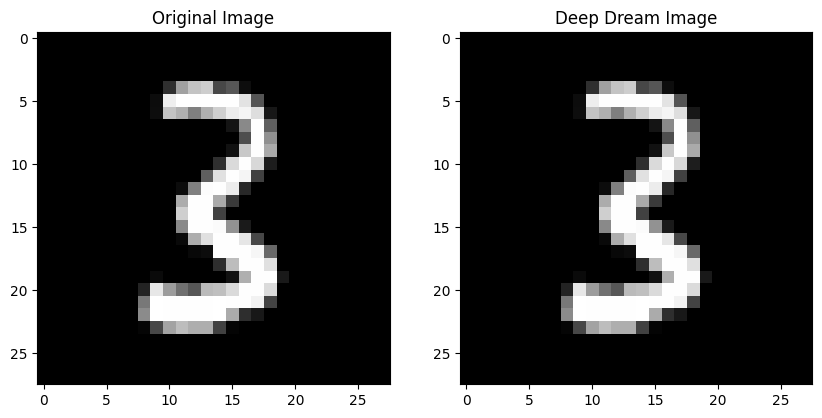

In [ ]:
import matplotlib.pyplot as plt

# Load MNIST data
(train_images, _), _ = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255

# Select an image
original_img = train_images[50000]

# Apply DeepDream
dream_img = deep_dream(model, original_img)

# Visualize the original and dream image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_img.squeeze(), cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Deep Dream Image")
plt.imshow(dream_img.numpy().squeeze(), cmap='gray')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()


Epoch 1/2
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0335 - val_accuracy: 0.9952
Epoch 2/2
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0512 - val_accuracy: 0.9931


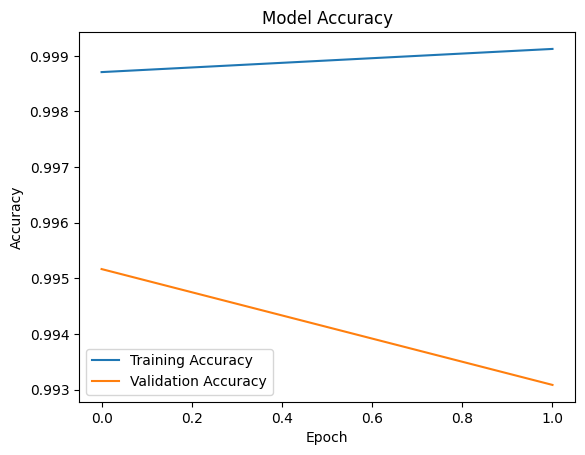

In [ ]:
# Assuming you have a model and training data

history = model.fit(train_images, train_labels, epochs=2, validation_split=0.2)
plot_accuracy(history)
